# purpose of this note
- We already have some summary statistics about SNPs on mapped fragements
- This note visualize that information
- We assume that we have a table file of following fields:
  - name of the mapped fragments
  - total # of mismatches in the read
  - total # of mismatches that has a hit on dbSNP by its position
  - total # of mismatches that has the same entry on dbSNP
- we create three histograms on the table

In [1]:
%matplotlib inline
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

/home/ytanigaw/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# prepare stats data

In [2]:
JOB_TMP='{scratch}/tmp/{slurm_job_id}'.format(scratch = os.environ['SCRATCH'],
                                              slurm_job_id = os.environ['SLURM_JOB_ID'])
!echo $JOB_TMP
!if [ ! -e $JOB_TMP ]; then mkdir -p $JOB_TMP; fi

/scratch/users/ytanigaw/tmp/12015648


In [3]:
#snps_file = '/scratch/users/ytanigaw/20170111/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps'
snps_file = '/share/PI/mrivas/data/nanopore-wgs-consortium/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps'
snps_stats='{tmp}/{base}.count'.format(tmp = JOB_TMP, base=os.path.basename(snps_file))
print snps_stats

/scratch/users/ytanigaw/tmp/12015648/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps.count


In [4]:
!echo $snps_file
!echo $snps_stats

/share/PI/mrivas/data/nanopore-wgs-consortium/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps
/scratch/users/ytanigaw/tmp/12015648/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps.count


In [5]:
!cat /share/PI/mrivas/data/nanopore-wgs-consortium/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps \
| awk 'BEGIN{OFS = "\t"} {print $1, $2, $3, $4, $5, $6}' \
| sed -e 's/_Basecall_Alignment_template//g' \
> /scratch/users/ytanigaw/tmp/12015648/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps.count

In [6]:
def make_plots(df, title_tail = '', filename = None):
    '''
    This function generates histogram of a vector x and save to file
    Inputs:
      df:         data frame
      title_tail: title of the plot
      filename:   name of the image file (if given, save to file)
    Side effect:
      save an image file if filename is given
    '''    
    cols = list(df.columns)[1:]
    fig = plt.figure(figsize=(8, (len(cols) + 1)/2 * 3))
    axs = [fig.add_subplot((len(cols) + 1)/2, 2, i + 1) for i in xrange(len(cols))]
    fig.tight_layout(w_pad=1.5, h_pad=3.0)
    for ax, col in zip(axs, cols):        
        ax.set_xlabel(col)
        ax.set_ylabel('Freq.')
        ax.set_title('hist: {head} {tail}'.format(head = col, tail = title_tail))
        ax.hist(df[col], 50)
        
    if(filename is not None):
        fig.savefig(filename)
    
    return

In [7]:
stats = pd.read_csv(snps_stats, sep = '\t')
stats.head()

,name,#mismatches,#mismatches_with_hits_to_dbSNP,#SNPs_with_var_id,#SNPs_with_var_id(validated),length
0,f625b61e-e94a-45c8-8735-16f74b6bb229,26,16,15,14,25354
1,9b651874-8afe-4b08-a86a-e9ce44531d89,41,13,12,8,29574
2,c54c4529-a9ec-4bef-ae1a-2ac59cfd1789,29,22,22,19,30003
3,ff257dee-34d5-43a2-a627-fe5dd72f3dd1,40,11,10,10,28526
4,1fb17054-a6b6-4fd1-b612-f7c2bb621b20,28,15,14,13,33965


/scratch/users/ytanigaw/tmp/12015648/nanopore-wgs.25000.sorted.10k.mapq50.ext.sorted.informative.q14.snps.count.png


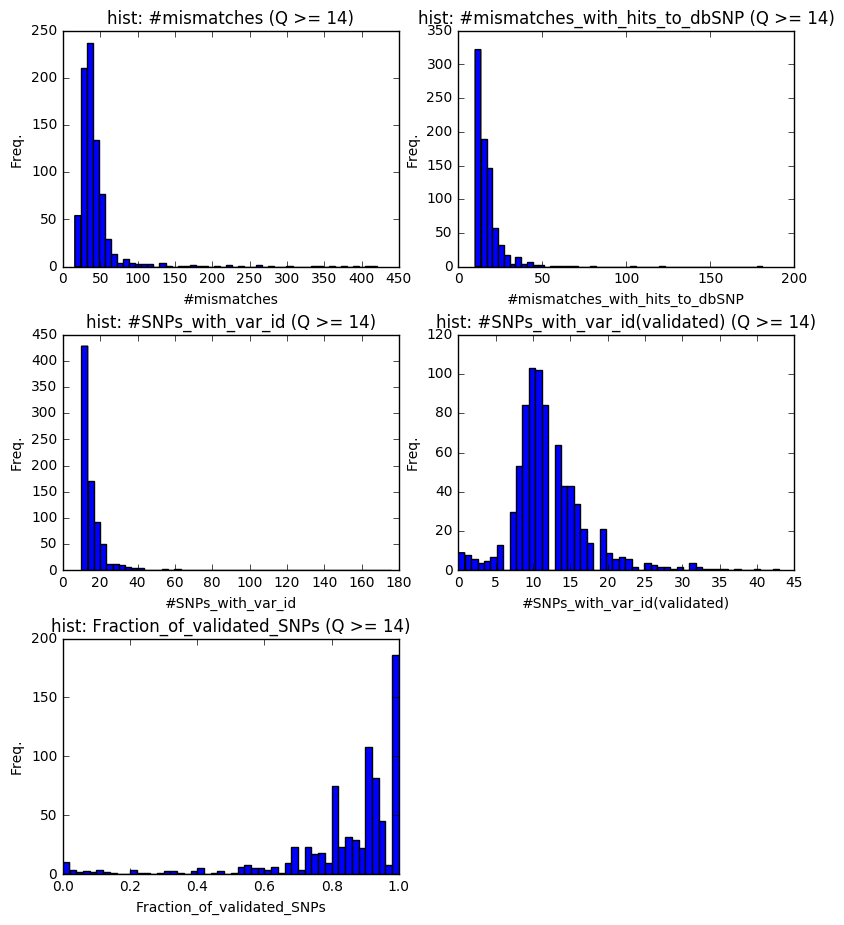

In [16]:
stats['Fraction_of_validated_SNPs'] = 1.0 * stats['#SNPs_with_var_id(validated)'] / stats['#SNPs_with_var_id']
make_plots(df=stats[[x for x in stats.columns if x != 'length']], title_tail='(Q >= 14)', 
           filename = '{tmp}/{head}.png'.format(tmp = JOB_TMP, head=os.path.basename(snps_stats)))
print '{tmp}/{head}.png'.format(tmp = JOB_TMP, head=os.path.basename(snps_stats))

In [17]:
!cp $JOB_TMP/*.png /home/ytanigaw/projects/nanopore/scripts/20170111/

In [18]:
!cp $JOB_TMP/*.png /share/PI/mrivas/data/nanopore-wgs-consortium/

In [19]:
def make_scatter(x, y, title = None, xlabel = None, ylabel = None, filename = None):
    '''
    This function generates scatter plot of vectors x and y and save to a file
    Inputs:
      x, y: data vectors
      title:    title of the plot
      xlabel:   label on x-axis
      ylabel:   label on y-axis
      filename: name of the image file (if given, save to file)
    Returns:
      matlab plot object
    Side effect:
      save an image file if filename is given
    '''
    
    import matplotlib
    matplotlib.use('agg')
    from matplotlib import pyplot as plt
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y)
    
    if(xlabel != None):
        ax.set_xlabel(xlabel)
    if(ylabel != None):
        ax.set_ylabel(ylabel)
    if(title != None):
        ax.set_title(title)
    if(filename != None):
        fig.savefig(filename)
    
    return

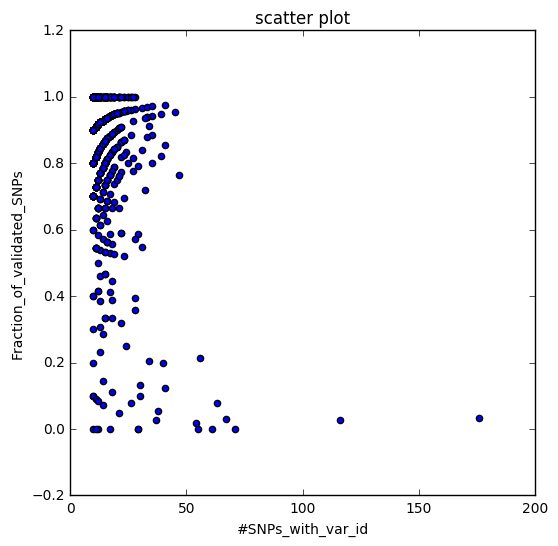

In [20]:
make_scatter(stats['#SNPs_with_var_id'], stats['Fraction_of_validated_SNPs'],
             title = 'scatter plot', 
             xlabel = '#SNPs_with_var_id', 
             ylabel = 'Fraction_of_validated_SNPs',
             filename = '{tmp}/{head}.scatter.png'.format(tmp = JOB_TMP, head=os.path.basename(snps_stats)))

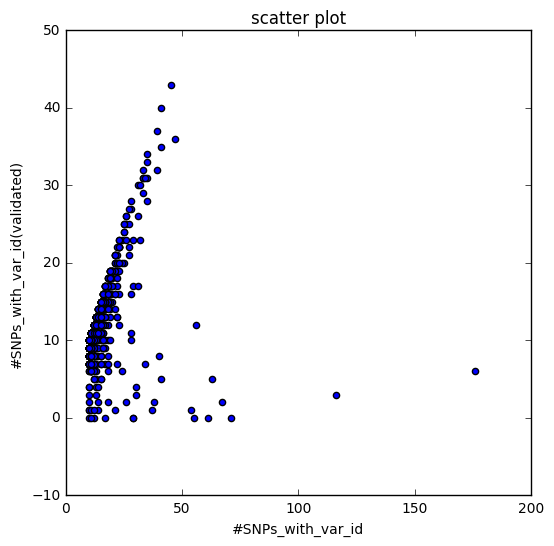

In [21]:
make_scatter(stats['#SNPs_with_var_id'], stats['#SNPs_with_var_id(validated)'],
             title = 'scatter plot', 
             xlabel = '#SNPs_with_var_id', 
             ylabel = '#SNPs_with_var_id(validated)',
             filename = '{tmp}/{head}.scatter2.png'.format(tmp = JOB_TMP, head=os.path.basename(snps_stats)))

In [24]:
stats['mismatch_rate'] = 1.0 * stats['#mismatches'] / stats['length']

In [25]:
stats.head()

,name,#mismatches,#mismatches_with_hits_to_dbSNP,#SNPs_with_var_id,#SNPs_with_var_id(validated),length,Fraction_of_validated_SNPs,mismatch_rate
0,f625b61e-e94a-45c8-8735-16f74b6bb229,26,16,15,14,25354,0.933333,0.001025
1,9b651874-8afe-4b08-a86a-e9ce44531d89,41,13,12,8,29574,0.666667,0.001386
2,c54c4529-a9ec-4bef-ae1a-2ac59cfd1789,29,22,22,19,30003,0.863636,0.000967
3,ff257dee-34d5-43a2-a627-fe5dd72f3dd1,40,11,10,10,28526,1.000000,0.001402
4,1fb17054-a6b6-4fd1-b612-f7c2bb621b20,28,15,14,13,33965,0.928571,0.000824


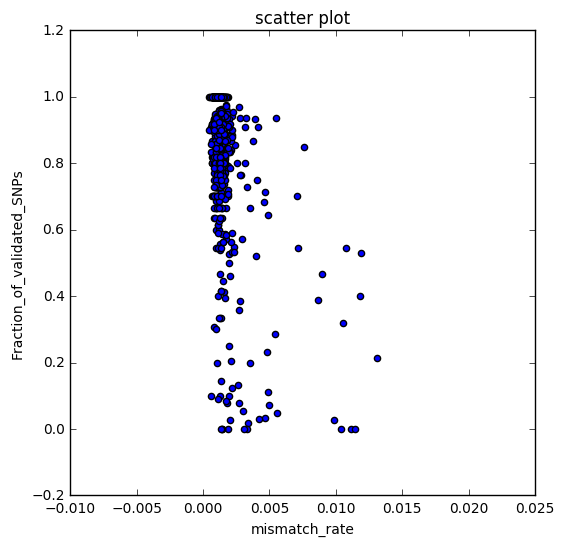

In [26]:
make_scatter(stats['mismatch_rate'], stats['Fraction_of_validated_SNPs'],
             title = 'scatter plot', 
             xlabel = 'mismatch_rate', 
             ylabel = 'Fraction_of_validated_SNPs',
             filename = '{tmp}/{head}.scatter3.png'.format(tmp = JOB_TMP, head=os.path.basename(snps_stats)))

In [84]:
def make_boxplots(x, y, title = None, xlabel = None, ylabel = None, filename = None):
    '''
    This function generates scatter plot of vectors x and y and save to a file
    Inputs:
      x, y: data vectors
      title:    title of the plot
      xlabel:   label on x-axis
      ylabel:   label on y-axis
      filename: name of the image file (if given, save to file)
    Returns:
      matlab plot object
    Side effect:
      save an image file if filename is given
    '''
    
    import matplotlib
    matplotlib.use('agg')
    from matplotlib import pyplot as plt
    
    fig = plt.figure(figsize=(6 * 2, 6))
    axs = [fig.add_subplot(1, 2, i+1) for i  in xrange(2)]
    fig.tight_layout(w_pad=1.5, h_pad=3.0)  
    y1 = [y[i] for i in xrange(len(x)) if x[i] <= 0.005]
    y2 = [y[i] for i in xrange(len(x)) if x[i] >  0.005]
    ys = [y1, y2]
    titles = ['{title_head} ( <= 0.005 )'.format(title_head = title),
              '{title_head} ( >  0.005 )'.format(title_head = title)]
    for i in xrange(2):
        ax = axs[i]
        ax.boxplot(ys[i])
        if(xlabel != None):
            ax.set_xlabel(xlabel)
        if(ylabel != None):
            ax.set_ylabel(ylabel)
        if(title != None):
            ax.set_title(titles[i])
 
    if(filename != None):
        fig.savefig(filename)
    
    return

In [85]:
x = np.array(stats['mismatch_rate'])
y = np.array(stats['Fraction_of_validated_SNPs'])

In [86]:
len([y[i] for i in xrange(len(x)) if x[i] <= 0.005])

788

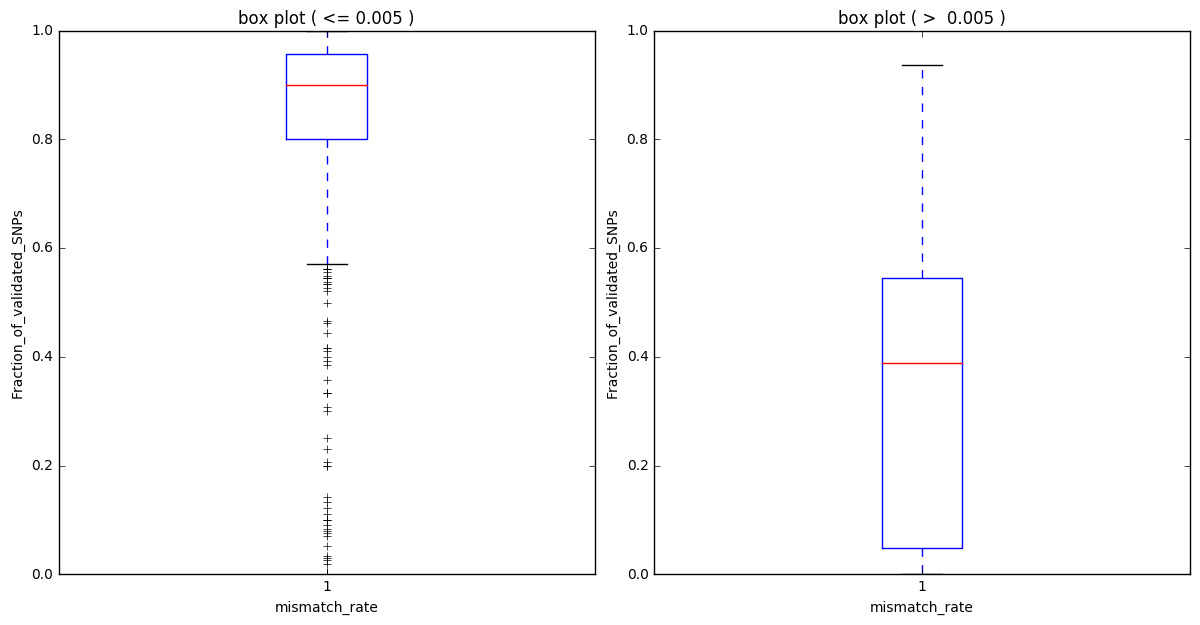

In [87]:
make_boxplots(stats['mismatch_rate'], stats['Fraction_of_validated_SNPs'],
              title = 'box plot', 
              xlabel = 'mismatch_rate', 
              ylabel = 'Fraction_of_validated_SNPs',
             filename = '{tmp}/{head}.boxes.png'.format(tmp = JOB_TMP, head=os.path.basename(snps_stats)))

In [88]:
!cp $JOB_TMP/*.png /share/PI/mrivas/data/nanopore-wgs-consortium/

In [89]:
!cp $JOB_TMP/*.png /home/ytanigaw/projects/nanopore/scripts/20170111/